# **Tutorial 1: Distributions**

**Week 2, Day 4, Extremes & Vulnerability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

In this initial tutorial, your focus will be on examining the distribution of annual extreme precipitation levels in Germany. Your objective is to explore various aspects of the distribution, including the mean, variance, and skewness. By the end of this tutorial, you will be able to:

- Visualize an observational record as both a timeseries and a distribution.
- Compute the *moments* of a record.
- Generate and plot a distribution with predefined *moments*.

# **Setup**

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pooch
from scipy import stats

In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [ ]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Inspect a Precipitation Record and Plot it Over Time**

The precipication files we will be using are from LINK. This data is the annual average extreme precipitation over the entirety of Germany, where an extreme value is recorded when XXXX. Jenna: WHAT DEFINES EXTREME HERE?

First, let us download the precipitation files:

In [ ]:
# download file: 'precipitationGermany_1920-2022.csv'
url_precipitationGermany = "https://osf.io/xs7h6/download"


data = pd.read_csv(pooch.retrieve(url_precipitationGermany, known_hash=None),
                   index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

In [ ]:
precipitation

Now we can plot a time series of the data from 1920-2022.

In [ ]:
precipitation.plot()#(x='years',y='rr')
plt.ylabel('Annual Mean Extreme Precipitation')

To make this dataset more interperatable, we can plot a histrogram of the data. Recall that we can make a histogram of this data by plotting the y-axis from the previous figure on the x-axis of this new figure versus the count of how many data points fall within a 'bin' on the x-axis. 

In [ ]:
# create the bins (x axis) for the data
bins=np.arange(0,precipitation.max(),2)

# make the histogram
sns.histplot(precipitation,bins=bins)

# set limits and labels
plt.xlim(bins[0],bins[-1])
plt.xlabel('Annual Mean Extreme Precipitation')

Next let's calculate the moments of our dataset. A [moment](https://glossary.ametsoc.org/wiki/Moment) helps us define the center of mass ([mean](https://glossary.ametsoc.org/wiki/Expected_value)), scale ([variance](https://glossary.ametsoc.org/wiki/Variance)), and shape ([skewness](https://glossary.ametsoc.org/wiki/Skewness) and [kurtosis](https://glossary.ametsoc.org/wiki/Kurtosis)) of a distribution. The scale is how the data is stretched or compressed along the x-axis, while the shape parameters help us answer questions about the geometry of the distribution, such as does data lie more frequently to one side of the mean than the other or are our tails 'heavy' (i.e. larger chance of getting extreme values).

Let's compute the mean, the variance and the [standard deviation](https://glossary.ametsoc.org/wiki/Standard_deviation) of your precipitation data. Plot the mean as a vertical line on the histogram.

In [1]:
# mean
mean_pr = precipitation.mean()

# variance
var_pr = precipitation.var()

# standard deviation
std_pr = precipitation.std()

NameError: name 'precipitation' is not defined

In [ ]:
mean_pr, var_pr, std_pr

In [ ]:
# re-plot histogram from above
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

# add in vertical line at mean
plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')
plt.xlabel('Annual Mean Extreme Precipitation')
plt.legend()

As you can observe, the range of values on either side of the mean-line you added earlier is unequal, indicating a potential skewed distribution. To assess the extent of the potential [skewness](https://glossary.ametsoc.org/wiki/Skewness), we will use the [`.skew()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html#pandas-dataframe-skew) function. We will also generate a set of 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness to that of the precipitation data.


In [ ]:
# calculate the skewness of our precip data
precipitation.skew()

In [ ]:
# generate data following an normal distribution (mean = 0, standard deviation = 1)
normal_data = np.random.normal(0,1,size=data.index.size)

In [ ]:
# calculate the skewness of a normal distribution
normal_data.skew()

Note that a higher positive value of skewness means the tail on the right is longer/heavier and extends more towards the positive values and vice versa for larger negative skewness. A dataset with no skewness would be 0 (as in the normal distribution case).

By comparing the precipitation data to the skewness of the normal distribution, we can see that our data is positively skewed, meaning that the right tail of the distribution contains more data than the left. This is in keeping with our finding from the histogram.

To delve deeper into this observation, let's try fiting a normal distribution to our precipitation data. This entails computing the mean and standard deviation of the 'precipitation' variable, which serve as the two parameters for a normal distribution. 

By utilizing the `scipy` function `norm.pdf`, we can generate a probability density function (pdf) that accompanies our histogram. The pdf provides insight into the probability of encountering various levels of precipitation based on the available data. As expected, the mean value exhibits the highest probability.

In [2]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

NameError: name 'np' is not defined

## Coding Exercises 1

Add uncertainty bands to the distribution.

1. Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record.
2. Compute the 5-th and 95-th percentiles across the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.

Hint: you can use the function `np.random.normal` to draw from a normal distribution. Call `np.random.normal` or `help(np.random.normal)` to understand how to use it. `np.quantile` is useful for computing quantiles. 

In [ ]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise: Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record.")
#################################################

# take 1000 records of 100 samples
random_samples = np.random.normal(mean_pr,std_pr,size=[...])

# create placeholder for pdfs
pdfs = np.zeros([x.size,1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = stats.norm.pdf(...)
    
    # add to array
    pdfs[:,i] = ...

In [37]:
# to_remove solution

# take 1000 records of 100 samples
random_samples = np.random.normal(mean_pr,std_pr,size=[100,1000])

# create placeholder for pdfs
pdfs = np.zeros([x.size,1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = stats.norm.pdf(x,random_samples[:,i].mean(),random_samples[:,i].std())
    
    # add to array
    pdfs[:,i] = pdfi

array([[9.51743358e-04, 4.68089739e-04, 4.82485828e-04, ...,
        3.41810148e-04, 5.59788229e-04, 1.72059918e-04],
       [1.20808347e-03, 6.25117306e-04, 6.45803296e-04, ...,
        4.59268790e-04, 7.23277131e-04, 2.47670922e-04],
       [1.52109150e-03, 8.26714361e-04, 8.55833999e-04, ...,
        6.11248130e-04, 9.26940176e-04, 3.52130226e-04],
       ...,
       [4.39001993e-10, 1.32582168e-11, 6.62831035e-12, ...,
        5.51405314e-11, 1.22454513e-09, 3.90621564e-14],
       [2.53939603e-10, 6.87050439e-12, 3.37563858e-12, ...,
        2.94448864e-11, 7.18551304e-10, 1.69570421e-14],
       [1.45705413e-10, 3.52576763e-12, 1.70209043e-12, ...,
        1.55746196e-11, 4.18221899e-10, 7.27071221e-15]])

In [ ]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise: Compute the 5-th and 95-th percentiles across the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.")
#################################################

# generate bins
...

# make histogram
...

# set x limits
...

# get y lims for plotting mean line
...

# add vertical line with mean
...
# generate an x axis for the pdf
x = ...

# plot pdf
plt.plot(...)

# plot 95th percentile
plt.plot(...)

# plot 5th percentile
plt.plot(...)

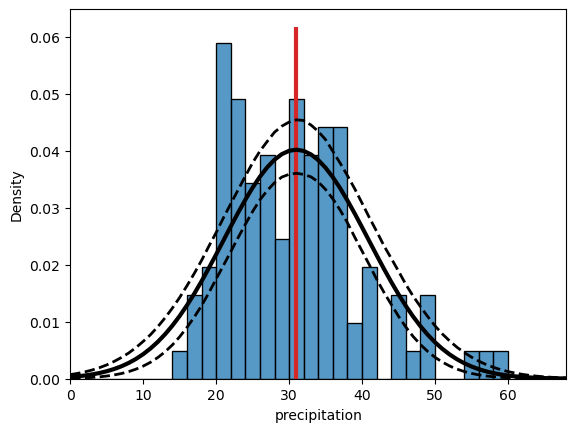

In [38]:
# to_remove solution

# generate bins
bins=np.arange(0,precipitation.max(),2)

# make histogram
sns.histplot(precipitation,bins=bins,stat='density')

# set x limits
plt.xlim(bins[0],bins[-1])

# get y lims for plotting mean line
ylim = plt.ylim()

# add vertical line with mean
plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

# generate an x axis for the pdf
x = np.arange(0,100,1)

# plot pdf
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

# plot 95th percentile
plt.plot(x, np.quantile(pdfs,0.95,axis=1),'--',lw=2,color='k')

# plot 5th percentile
plt.plot(x, np.quantile(pdfs,0.05,axis=1),'--',lw=2,color='k')

## Questions 1
1. Based on the current plot, does a normal distribution accurately describe your model? Why or why not? 

In [3]:
# to_remove explanation
"""
1.As presented in the figure above, the data falls largely outside of the percentiles you calculated. That, paired with the skewness calculated earlier suggests a different distribution may fit the data better. For example, log-normal distributions tend to be be better suited for describing skewed datasets such as this.
""";

# **Summary**
In this tutorial, you focused on the analysis of annual extreme precipitation levels in Germany. You started by visualizing the observational record as both a timeseries and a distribution. This led you to compute the moments of the record, specifically, the mean, variance, and standard deviation. By plotting the mean on a histogram, you noticed a potential skewed distribution. To explore this, you compared the skewness of the precipitation data to a normally distributed set of values. Finally you assessed the fit of a normal distribution to your dataset.

# Resources

Data from this tutorial can be found here. NEED TO ADD LINK